# Projeto de analise de dados: Um estudo de caso do Titanic

Este projeto tem como objetivo criar um documento que apresente um exemplo de aplicação de um processo de analise de dados utilizando o python. Esse projeto está divido em 4 partes:

<ol>
    <li><b>Apresentar os dados a ser analisados e as perguntas a serem respondidas</b></li>
    <li><b>Limpar e organizar os dados para serem analisados</b></li>
    <li><b>Apresentar gráficos com as relações entre dados para responder as perguntas elaboradas</b></li>
    <li><b>Tirar conclusões sobre os gráficos criados</b></li>
</ol>

Bom iremos começar primeiro com um overview do projeto, apresentando as perguntas que foram elaboradas.

## 1. Apresentação dos dados e perguntas.

Bom, primeiro vamos visualizar a amostra de dados que iremos trabalhar, no caso, veremos algumas informações sobre passageiros do Titanic:

In [264]:
# importas as bibliotecas necessarias para realização do projeto
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ler o arquivo csv com os dados e apresentar uma amostra minima.
df = pd.read_csv('titanic-data-6.csv')
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Bom, vimos que entre os dados apresentados tivemos:
<ul>
    <li>Se o passageiro sobreviveu ou não<li>
    <li>Qual a classe de passagem que o passageiro tinha</li>
    <li>Qual a idade do passageiro</li>
    <li>Onde ele embarcou</li>
</ul>

Entre estes e outros dados, conseguimos elaborar as seguintes perguntas:
<ul>
    <li><b>Qual a proporção entre as cidades embarcadas e a classe de ticket compradas? </b>(isso talvez ajude a dar uma ideia se uma cidade tinha uma populaçao com melhores condições que outra) </li>
    <li><b>Quais as caracteristicas dos passageiros que sobreviveram?</b>(Isso pode me dizer se a difrença de sexo, idade ou classe de passagem influenciou na sobrevivencia do passageiro) </li>
    <li><b>Quais as caracteristicas dos passageiros por cada classe de passagem?</b>(Com isso podemos concluir quais eram os atributtos das pessoas que gastaram mais dinheiro em melhores passagens) </li>
</ul>

Será respondido pelo menos 2 destas perguntas nesta analise. agora passamos a fase de limpeza dos dados

## 2. Processo de Limpeza dos dados

Agora, será feito o processo de limpeza de dados, verificando 2 fatores:

<ul>
    <li>Se existem dados duplicados</li>
    <li>Se existem dados faltantes</li>
    <li>Transformar os valores das colunas para facilitar a compreensão</li>
</ul>
Vamos começar verificando se existem dados duplicados.

In [265]:
sum(df.duplicated())

0

Bom, vimos que não existem dados duplicados, o que já facilita nossa analise, a seguir vamos verificar os dados faltantes.

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Bom parece que existem dados faltantes de <b>Age</b>, <b>Embarked</b> e <b>Cabin</b>. 

Completar a idade é facil, podemos apenas completar com a média de idades dos passageiros.

A coluna de Embarcados (Cidade), podemos completar com a maior cidade embarcada, por ser apenas 2 faltantes.

A coluna de cabines é mais complicado, podemos supor que se o ticket for igual entre 2 passageiros eles provavelmente estavam na mesma cabine, entretanto temos que verificar isso:

In [267]:
# Completar os dados colocando a media das idades nos dados faltantes
age_mean = df['Age'].mean()
df['Age'].fillna(age_mean, inplace=True)

#Completar os dados de 'Embarked' colocando a maior cidade dos dados
df.groupby(['Embarked']).agg(['count'])
df['Embarked'] = df['Embarked'].fillna('S')

In [268]:
# Vamos verificar se a suposição que fizemos é valida verificando alguns exemplos se o numero do ticket pode verificar o quarto.
df[df['Ticket'].duplicated()].sort_values('Ticket')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
504,505,1,1,"Maioni, Miss. Roberta",female,16.000000,0,0,110152,86.5000,B79,S
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.000000,0,0,110152,86.5000,B77,S
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.000000,1,1,110413,79.6500,E67,S
585,586,1,1,"Taussig, Miss. Ruth",female,18.000000,0,2,110413,79.6500,E68,S
475,476,0,1,"Clifford, Mr. George Quincy",male,29.699118,0,0,110465,52.0000,A14,S
523,524,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.000000,0,1,111361,57.9792,B18,C
356,357,1,1,"Bowerman, Miss. Elsie Edith",female,22.000000,0,1,113505,55.0000,E33,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.000000,0,0,113572,80.0000,B28,S
802,803,1,1,"Carter, Master. William Thornton II",male,11.000000,1,2,113760,120.0000,B96 B98,S
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.000000,1,2,113760,120.0000,B96 B98,S


Parece que infelizmente, o ticket não defini a cabine em que o passageiro ficou, posi existem passageiros com o mesmo ticket mas que ficou em cabines diferentes, então essa não é a forma correta de completar estes dados.

Agora vamos alterar os tipo de dados de algumas colunas para facilitar a compreensão

In [269]:
# Alterar a coluna 'Survived' para booleano, para verificar imediatamente se o passageiro sobreviveu
df['Survived'] = df['Survived'].astype('bool')

# Mapear a coluna 'Sex' para simplificar a tabela
df['Sex'] = df['Sex'].map({'male': 'M', 'female': 'F'})

## Apresentar gráficos com as relações entre dados para responder as perguntas

Agora vamos gerar alguns graficos relacionando dados. então vamos tentar resolver alguma das perguntas:

### Qual a média das passagens por cidade em que o passageiro embarcou?

In [270]:
# Primeiro vamos agrupar as cidades e as classes de ticket para podemos somar a quantidade de passageiros
df_ebk_by_pc = df.groupby(['Embarked','Pclass'])['Pclass'].count().unstack('Pclass').fillna(0)
df_ebk_by_pc

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,129,164,353


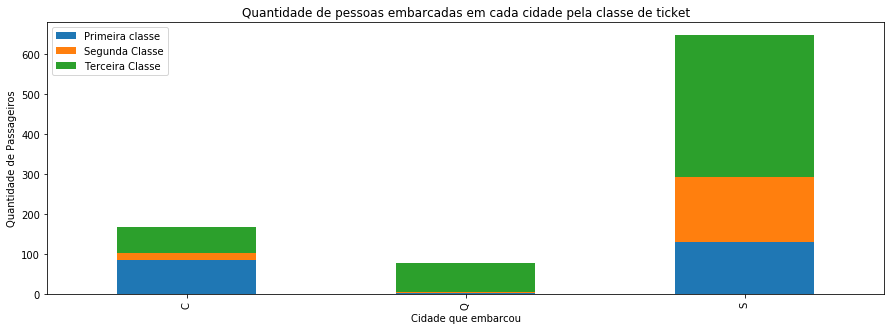

In [286]:
# Agora com o agrupamento gerado vamos montar um gráfico para comparar as cidades
# uma função para reaproveitar o código pode ajudar neste caso para futuros gráficos

def plot_bar(dataframe, title, stacked, legend, xLabel, yLabel):
    fig, ax = plt.subplots(figsize=(15,5))
    dataframe.plot(kind = 'bar', title = title, stacked = stacked, ax = ax)
    ax.legend(legend)
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)

plot_bar(df_ebk_by_pc,'Quantidade de pessoas embarcadas em cada cidade pela classe de ticket', True, 
        ["Primeira classe", "Segunda Classe", "Terceira Classe"], 'Cidade que embarcou', 'Quantidade de Passageiros')

É possível ver agora cada cidade de embarque, a quantidade de passageiros que embarcaram e suas classes de ticket, clareando a ideia de como devia ser a população de cada cidade.

### Quais as caracteristicas dos passageiros que sobreviveram

In [277]:
# Primeiro vamos agrupar pelo sexo e vemos as medias de idade das pessoas que sobreviveram por cada sexo
df_age_by_survsex_mean = df.groupby(['Survived', 'Sex', 'Pclass'])['Age'].mean().unstack('Pclass').fillna(0)
df_age_by_survsex_mean

Pclass                1          2          3
Survived Sex                                 
False    F    25.666667  36.000000  25.206736
         M    41.489427  33.086745  27.948083
True     F    34.420792  28.127118  22.930249
         M    35.520346  17.631073  23.696001

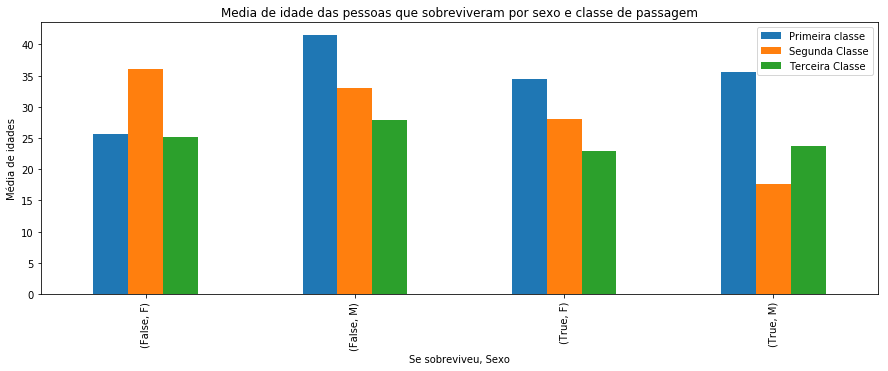

In [292]:
# com o agrupamento feito, agora podemos gerar o gráfico para analisarmos melhor
plot_bar(df_age_by_survsex_mean,'Media de idade das pessoas que sobreviveram por sexo e classe de passagem', False, 
        ["Primeira classe", "Segunda Classe", "Terceira Classe"], 'Se sobreviveu, Sexo', 'Média de idades')

Com este gráfico, podemos ver com mais clareza algumas das caracteristicas entre os tripulantes que sobreviveram ou não 
baseado na idade e classe do ticket

In [282]:
# primeiro analisamos as médias de idades, agora vamos contar a quantidade de passageiros
df_age_by_survsex = df.groupby(['Survived', 'Pclass'])['Pclass'].count().unstack('Pclass').fillna(0)
df_age_by_survsex

Pclass,1,2,3
Survived,,,
False,80,97,372
True,136,87,119


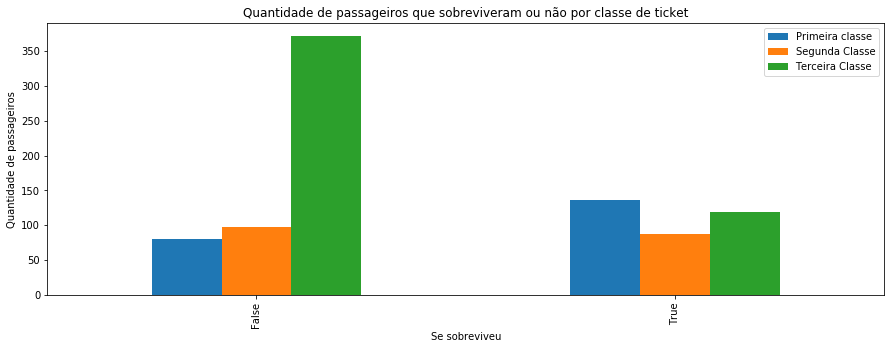

In [294]:
plot_bar(df_age_by_survsex,'Quantidade de passageiros que sobreviveram ou não por classe de ticket', False, 
        ["Primeira classe", "Segunda Classe", "Terceira Classe"], 'Se sobreviveu', 'Quantidade de passageiros')

Com isso podemos ter uma ideia de como foi feito a evacuação dos tripulantes e quem teve mais chances de sobreviver ou não,
além de conseguir ver a grande diferença de pessoas que infelizmente não sobreviveram, com o pequeno grupo de pessoas 
que sobreviveu.

Agora, vamos criar 2 gráficos para ver entre quais idades mais pessoas sobreviveram ou não:

In [406]:
# primeiro vamos criar uma coluna para definir entre que idade o embarcante está
df['age_group'] = pd.cut(df["Age"], np.array([0, 10,20,30,40,50,60,70,80]))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
0,1,False,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20, 30]"
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C85,C,"(30, 40]"
2,3,True,3,"Heikkinen, Miss. Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20, 30]"
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,C123,S,"(30, 40]"
4,5,False,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.0500,NaN,S,"(30, 40]"


In [407]:
# aqui, será corrigir o dado gerado
df['age_group'] = df['age_group'].astype('str')
df['age_group'] = df['age_group'].str.replace(']',')')

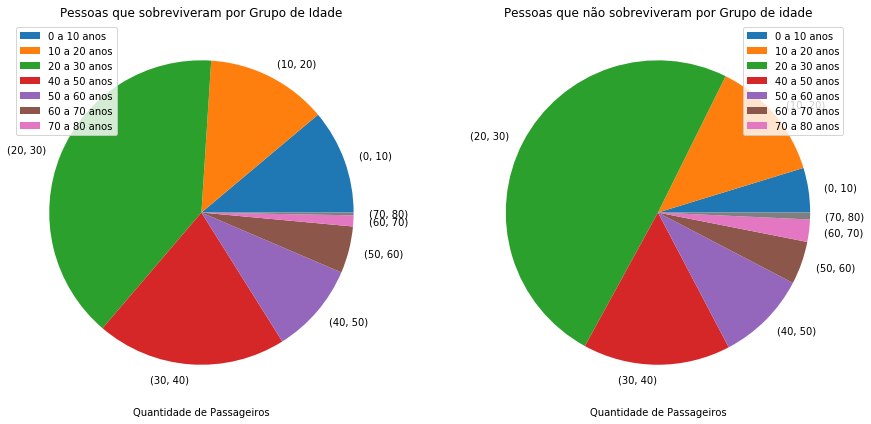

In [404]:
#agora, vamos criar 2 gráficos, um comparando as pessoas que sobreviveram com as que não sobreviveram
df_age_groups_survived = df.query('Survived == True').groupby('age_group')['age_group'].count()
df_age_groups_not_survived = df.query('Survived == False').groupby('age_group')['age_group'].count()

def plot_pie_age_range_compare(title1, title2, xLabel):
    legend = ['0 a 10 anos', '10 a 20 anos', '20 a 30 anos', '40 a 50 anos','50 a 60 anos', '60 a 70 anos', '70 a 80 anos']
    fig, axs = plt.subplots(1,2, figsize=(15,7))
    df_age_groups_survived.plot(kind = 'pie', ax=axs[0], title = title1)
    df_age_groups_not_survived.plot(kind = 'pie', ax=axs[1], title = title2)
    axs[0].legend(legend)
    axs[1].legend(legend)
    axs[0].set_xlabel(xLabel)
    axs[0].set_ylabel('')
    axs[1].set_xlabel(xLabel)
    axs[1].set_ylabel('')

plot_pie_age_range_compare('Pessoas que sobreviveram por Grupo de Idade','Pessoas que não sobreviveram por Grupo de idade'
                           ,'Quantidade de Passageiros')


Com estes gráficos, é possível ver que a idade não foi um grande fator para a sobrevivencia no acidente.

## Conclusões

Bom obtemos as seguintes consluões sobre os dados apresentados sobre as cidades:

<ul>
    <li><b>A cidade de southampton devia ser a maior cidade entre as 3 e com mais pessoas pobres que queriam ir para os estados unidos, provavelmente para uma nova chance de vida</b>
    </li>
    <li><b>A cidade de Cherbourg, provavelmente devi ser uma cidade mais fechada e voltada a pessoas que tinham muito dinheiro, porque foi a unica cidade que foram mais pessoas na primeira classe do que as outras cidades</b></li>
</ul>

A seguir, as conclusões de sobre as caracteristicas de quem sobreviveu

<ul>
    <li><b>As pessoas que comprar ingressos de classe melhor, tiveram melhores chances de sobreviver, foi apresentado que muitas pessoas que compraram as passagens mais simples não sobreviveram</b>
    </li>
    <li><b>A media de idade das pessoas que morrem e sobreviveram foram parecidas, então , apesar de mais homens não terem sobrevivido do que as mulheres, a idade não foi um fator muito importante na sobrevivencia da tripulação</b></li>
</ul>

### Limitações

Nesta analise, foi identificado a limitação de falta de alguns dados das seguintes colunas: Age, Embarked e Cabin.
A coluna 'Age' foi possivel ser completada, colocando a média das idades nas linhas faltantes.
A coluna 'Cabin' não tinha alguma lógica que nos ajudasse a completar os dados, pois apesar da coluna 'Ticket' nos dar uma pista de onde o passageiro estava hospedado, foi identificado que tripulantes com a mesma passagem estava em quartos diferentes, o que deixa a duvida de qual era a lógica envolvida na escolha da cabine.
A coluna 'Embarked' por possuir um numero muito pequeno de linhas faltantes em relação a amostra total, completamos as linhas com a cidade que mais tinha passageiros, pois não influenciaria de forma significativa a analise.

Alteração Github